In [ ]:
"""
RIESGO 3 - Figura 1
Consumo mundial de energía primaria por fuente, 2013-2024(TWh).
"""
import pandas as pd
import requests
import json
from google.colab import files
from google.colab import drive

# Fetch the data
df = pd.read_csv(
    "https://ourworldindata.org/grapher/global-primary-energy.csv?v=1&csvType=full&useColumnShortNames=true",
    storage_options={'User-Agent': 'Our World In Data data fetch/1.0'}
)

# Fetch the metadata
metadata = requests.get(
    "https://ourworldindata.org/grapher/global-primary-energy.metadata.json?v=1&csvType=full&useColumnShortNames=true"
).json()

# Guardar el dataframe en un archivo de Excel en el entorno de Colab
df.to_excel("/content/global_primary_energy_data.xlsx", index=False)

# Guardar los metadatos en un archivo JSON en el entorno de Colab
with open("/content/metadata.json", "w") as json_file:
    json.dump(metadata, json_file, indent=4)

print("Los archivos se han guardado correctamente en el entorno de Google Colab.")

# Opción 1: Descargar los archivos a tu computadora
files.download("/content/global_primary_energy_data.xlsx")
files.download("/content/metadata.json")

Los archivos se han guardado correctamente en el entorno de Google Colab.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  Entity      Code  Year  biofuels__twh_direct_energy  \
0  World  OWID_WRL  1800                          0.0   
1  World  OWID_WRL  1810                          0.0   
2  World  OWID_WRL  1820                          0.0   
3  World  OWID_WRL  1830                          0.0   
4  World  OWID_WRL  1840                          0.0   

   other_renewables__twh_direct_energy  solar__twh_direct_energy  \
0                                  0.0                       0.0   
1                                  0.0                       0.0   
2                                  0.0                       0.0   
3                                  0.0                       0.0   
4                                  0.0                       0.0   

   wind__twh_direct_energy  hydropower__twh_direct_energy  \
0                      0.0                            0.0   
1                      0.0                            0.0   
2                      0.0                            0.0   
3   

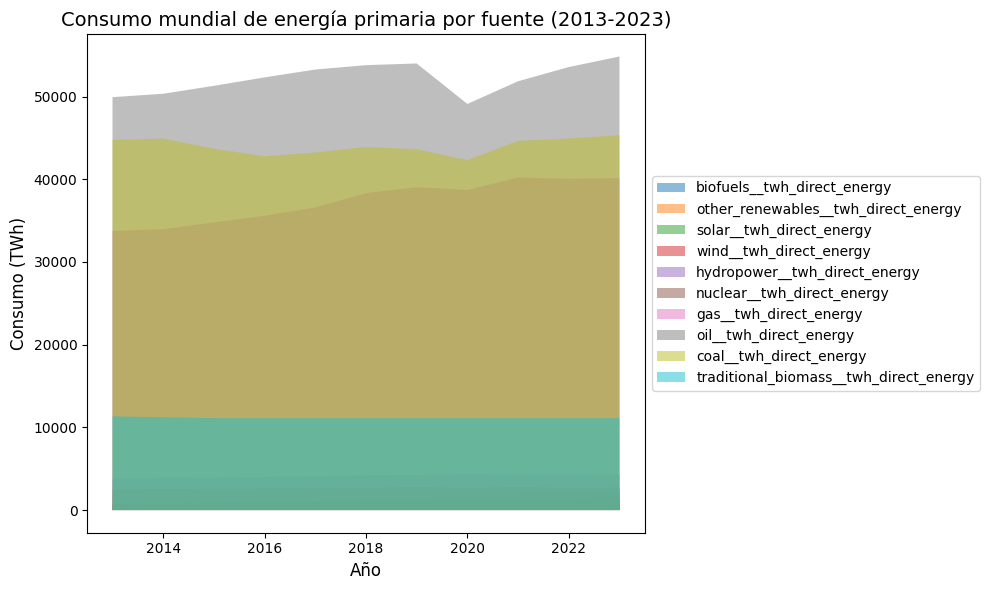

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Fetch the data
df = pd.read_csv(
    "https://ourworldindata.org/grapher/global-primary-energy.csv?v=1&csvType=full&useColumnShortNames=true",
    storage_options={'User-Agent': 'Our World In Data data fetch/1.0'}
)

# Ver las primeras filas del dataframe para inspeccionar su estructura
print(df.head())

# Filtrar el dataframe para los años de 2013 a 2023
df_filtered = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

# Fuentes de energía: todas las columnas excepto 'Entity', 'Code', y 'Year'
energy_sources = [
    'biofuels__twh_direct_energy',
    'other_renewables__twh_direct_energy',
    'solar__twh_direct_energy',
    'wind__twh_direct_energy',
    'hydropower__twh_direct_energy',
    'nuclear__twh_direct_energy',
    'gas__twh_direct_energy',
    'oil__twh_direct_energy',
    'coal__twh_direct_energy',
    'traditional_biomass__twh_direct_energy'
]

# Crear el gráfico de áreas
plt.figure(figsize=(10, 6))

# Crear un gráfico de áreas para cada fuente de energía
for source in energy_sources:
    plt.fill_between(df_filtered['Year'],
                     df_filtered[source],
                     label=source, alpha=0.5)

# Etiquetas y título
plt.title("Consumo mundial de energía primaria por fuente (2013-2023)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Consumo (TWh)", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustar el gráfico y mostrarlo
plt.tight_layout()
plt.show()


In [ ]:
"""
RIESGO 3 - Figura 1
América del Sur: consumo mundial de energía primaria por fuente, 2024 (porcentaje de participación).
"""
import pandas as pd

# Cargar datos
df = pd.read_csv(
    "https://ourworldindata.org/grapher/energy-consumption-by-source-and-country.csv?v=1&csvType=full&useColumnShortNames=true",
    storage_options={'User-Agent': 'Our World In Data data fetch/1.0'}
)

# Países que quieres
paises = ['Brazil', 'Peru', 'Chile', 'Colombia', 'Mexico', 'Argentina']

# Países de América del Sur para sumar región
paises_sur = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana',
    'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

# Columnas de consumo energético
cols_energia = [
    'oil_consumption_twh',
    'gas_consumption_twh',
    'hydro_consumption_equivalent_twh',
    'other_renewables_consumption_equivalent_twh',
    'biofuels_consumption_twh',
    'solar_consumption_equivalent_twh',
    'nuclear_consumption_equivalent_twh',
    'coal_consumption_twh',
    'wind_consumption_equivalent_twh'
]

# Filtrar solo los países de interés para no trabajar con todo el dataset
df_paises = df[df['Entity'].isin(paises + paises_sur)].copy()

# Función para agregar América del Sur sumando por año y fuente
def agregar_america_del_sur(df, paises_sur, cols):
    # Filtrar solo países de América del Sur
    df_sur = df[df['Entity'].isin(paises_sur)]
    # Agrupar por año y sumar por fuente energética
    df_amer_sur = df_sur.groupby('Year')[cols].sum().reset_index()
    df_amer_sur['Entity'] = 'América del Sur'
    # Reordenar columnas para juntar
    cols_order = ['Entity', 'Year'] + cols
    df_amer_sur = df_amer_sur[cols_order]
    return df_amer_sur

# Crear DataFrame con América del Sur
df_amer_sur = agregar_america_del_sur(df_paises, paises_sur, cols_energia)

# Juntar América del Sur con países
df_final = pd.concat([df_paises[['Entity', 'Year'] + cols_energia], df_amer_sur], ignore_index=True)

# Calcular porcentaje por fila (por país y año)
df_final_pct = df_final.copy()
df_final_pct[cols_energia] = df_final[cols_energia].div(df_final[cols_energia].sum(axis=1), axis=0) * 100

# Renombrar columnas para que coincidan con etiquetas del gráfico
renombrar = {
    'oil_consumption_twh': 'Petróleo',
    'gas_consumption_twh': 'Gas',
    'hydro_consumption_equivalent_twh': 'Hidráulico',
    'other_renewables_consumption_equivalent_twh': 'Otras energías renovables*',
    'biofuels_consumption_twh': 'Biocombustibles',
    'solar_consumption_equivalent_twh': 'Solar',
    'nuclear_consumption_equivalent_twh': 'Nuclear',
    'coal_consumption_twh': 'Carbón',
    'wind_consumption_equivalent_twh': 'Eólico'
}

df_final_pct.rename(columns=renombrar, inplace=True)

# Reordenar columnas para que coincida con gráfico
orden_columnas = [
    'Entity', 'Year', 'Petróleo', 'Gas', 'Hidráulico', 'Otras energías renovables*',
    'Biocombustibles', 'Solar', 'Nuclear', 'Carbón', 'Eólico'
]

df_final_pct = df_final_pct[orden_columnas]

# Redondear porcentajes a 1 decimal
df_final_pct[orden_columnas[2:]] = df_final_pct[orden_columnas[2:]].round(1)

# Guardar a Excel
df_final_pct.to_excel("tabla_consumo_energia_por_pais_todos_los_anos.xlsx", index=False)

print("Archivo Excel con todos los años generado con éxito.")

# Descargar en Google Colab
from google.colab import files
files.download("tabla_consumo_energia_por_pais_todos_los_anos.xlsx")


Archivo Excel con todos los años generado con éxito.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>